# Statistics Tutorial

https://www.youtube.com/playlist?list=PLGLfVvz_LVvQjNJr85J4U_lxDg8vgqvcO \
https://www.newthinktank.com/2020/07/statistics-every-day/

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from statsmodels import api as sm
import math
import csv

In [2]:
def convert_csv_list(filename):
    with open(filename, newline="") as csv_file:
        reader = csv.reader(csv_file)
        list_2d = list(reader)

        for row in range(0, len(list_2d)):
            for col in range(0, len(list_2d[row])):
                try:
                    list_2d[row][col] = float(list_2d[row][col].strip())
                except:
                    continue
    return list_2d

## Part 1
https://www.youtube.com/watch?v=YCPYNXtwKAc&list=PLGLfVvz_LVvQjNJr85J4U_lxDg8vgqvcO&index=1&ab_channel=DerekBanas

#### Mean: Average of Data Set
Mean Population: $\mu$ \
Mean Sample: $\bar{x}$
$$
\mu = \frac{1}{N} \sum_{i = 1}^{N} x_i 
\qquad \qquad 
\bar{x} = \frac{1}{n} \sum_{i = 1}^{n} x_i
$$

In [3]:
def mean(*args):
    val_sum = sum(args)
    return val_sum / len(args)

print('Mean: ', mean(1,2,3,4,5))

Mean:  3.0


#### Median: Number at Center of Data Set

In [4]:
def median(*args):
    args = sorted(args)
    if len(args) % 2 == 0:
        left_center = int(len(args) / 2) - 1
        right_center = left_center + 1
        return mean(args[left_center], args[right_center])
    else:
        center = int(len(args) / 2)
        return args[center]

print('Median: ', median(28, 20, 24, 10, 28, 32, 40))

Median:  28


#### Mode: Number that occurs the Most

In [5]:
def mode(*args):
    frequencies = {arg : args.count(arg) for arg in args}
    mode = [key for key, val in frequencies.items() if val == max(frequencies.values())]
    return mode

print('Mode: ', mode(1,1,2,2,3))

Mode:  [1, 2]


#### Variance: How Data is Spread around the Mean
Variance Population: $\sigma^2$ \
Variance Sample: $S^2$
$$
\sigma^2 = \frac{1}{N} \sum_{i = 1}^{N} (x_i - \mu)^2 
\qquad \qquad
S^2 = \frac{1}{n - 1} \sum_{i = 1}^{n} (x_i - \bar{x})^2
$$

In [13]:
def variance(*args):
    if len(args) <= 1:
        return None

    mean_val = mean(*args)
    numerator = sum([(arg - mean_val) ** 2 for arg in args])
    return numerator / (len(args) - 1)


print('Variance: ', variance(4,3,6,5,2))

Variance:  2.5


#### Standard Deviation

Standard Deviation Population: $\mu$ \
Standard Deviation Sample: $S$

$$
\sigma = \sqrt{\frac{1}{N} \sum_{i = 1}^{N} (x_i - \mu)^2}
\qquad \qquad
S = \sqrt{\frac{1}{n - 1} \sum_{i = 1}^{n} (x_i - \bar{x})^2}
$$

In [14]:
def standard_deviation(*args):
    variance_val = variance(*args)
    if variance_val == None:
        return None

    return math.sqrt(variance_val)

print('Standard Deviation: ', standard_deviation(4,3,6,5,2))

Standard Deviation:  1.5811388300841898


#### Coefficient of Variation: How Data is Spread in relation to the Mean

$$
\text{Coefficient of Variation} = \frac{S}{\bar{x}}
$$

In [15]:
def coefficient_variation(*args):
    sd = standard_deviation(*args)
    mean_val = mean(*args)
    if sd == None or mean_val == None:
        return None

    return sd / mean_val


miles = [3, 4, 4.5, 3.5]
kms = [4.828, 6.437, 7.242, 5.632]
print('Coefficient Variance (m): ',  coefficient_variation(*miles))
print('Coefficient Variance (km): ', coefficient_variation(*kms))


Coefficient Variance (m):  0.17213259316477408
Coefficient Variance (km):  0.17214686292344047


#### Covariance: Which Direction 2 Datasets are Moving

$$
\text{COV} =  \frac{1}{n - 1} \sum_{i = 1}^{n} (x_i - \bar{x})^2 (y_i - \bar{y})^2
$$

 - COV > 0: The datasets are moving Together \
 - COV < 0: The datasets are moving Opposite \
 - COV = 0: The datasets are moving Independently of each other


In [16]:
def covariance(x, y):
    if (len(x) != len(y)):
        return None

    mean_x = mean(*x)
    mean_y = mean(*y)
    numerator = 0
    for i in range(0, len(x)):
        numerator += (x[i] - mean_x) * (y[i] - mean_y)
    return numerator / (len(x) - 1)


market_cap = [1532, 1488, 1343, 928, 615]
earnings = [58, 35, 75, 41, 17]
print('Covariance: ', covariance(market_cap, earnings))


Covariance:  5803.200000000001


#### Correlation Coefficient: How Dependent Datasets are to Each Other
$$
r = \frac{COV(X,Y)}{S(X) * S(Y)}, \qquad -1 < r < 1
$$

 - r = 1: Perfect Correlation \
 - As r approaches 1, the closer the relation between the two datasets \
 - As r approaches -1, the closer the inverse relation between the two datasets \
 - r = 0: Independence

In [17]:
def correlation_coefficient(x, y):
    if (len(x) != len(y)):
        return None

    return covariance(x, y) / (standard_deviation(*x) * standard_deviation(*y))

print('Correlation Coefficient: ', correlation_coefficient(market_cap, earnings))

Correlation Coefficient:  0.660125602195931


## Part 2
https://www.youtube.com/watch?v=ger_Won5sRQ&list=PLGLfVvz_LVvQjNJr85J4U_lxDg8vgqvcO&index=2&ab_channel=DerekBanas

In [18]:
sales_data = convert_csv_list('computersales.csv')

def get_index_header(heading):
    for i in range(0, len(sales_data[0])):
        if heading.lower() == sales_data[0][i].lower():
            return i
    return -1

In [19]:
def get_count_category(index):
    data_list = [0] * 40
    data_dict = {}
    for i in range(1, len(sales_data)):
        data_list[i] = sales_data[i][index]

    del data_list[0]
    data_set = set(data_list)
    unique_list = list(data_set)

    for i in range(0, len(unique_list)):
        unique_item = unique_list[i]
        data_dict[unique_item] = data_list.count(unique_item)

    return data_dict

index_sex = get_index_header('Contact Sex')
count_sex = get_count_category(index_sex)
print('Sex: ', count_sex)

Sex:  {'M': 22, 'F': 17}


In [20]:
def get_key_profit_list(index, data_dict):
    index_profit = get_index_header('Profit')
    profit_dict = {}
    for key in data_dict.keys():
        profit_dict[key] = []
        for i in range(1, len(sales_data)):
            if key == sales_data[i][index]:
                profit = float(sales_data[i][index_profit])
                profit_dict[key].append(profit)

    return profit_dict

profit_sex = get_key_profit_list(index_sex, count_sex)
profit_female = profit_sex['F']
profit_male = profit_sex['M']
print('Sex Profit: ', profit_sex)

Sex Profit:  {'M': [143.39, 118.64, 72.09, 146.69, 122.34, 143.39, 180.34, 122.34, 118.64, 146.69, 72.09, 143.39, 180.34, 122.34, 143.09, 143.09, 98.09, 143.39, 180.34, 143.39, 180.34, 72.09], 'F': [230.89, 98.09, 230.89, 180.34, 230.89, 72.09, 98.09, 146.69, 122.34, 143.09, 118.64, 180.34, 230.89, 72.09, 98.09, 146.69, 122.34]}


In [21]:
def get_profit_mean_category_dict(data_dict):
    profit_mean_dict = {}
    for key in data_dict.keys():
        profit_mean_dict[key] = mean(*data_dict[key])
    return profit_mean_dict

print('Sex Profit Mean: ', get_profit_mean_category_dict(profit_sex))

Sex Profit Mean:  {'M': 133.47863636363638, 'F': 148.38117647058826}


In [22]:
def get_all_profit_data(index):
    title = sales_data[0][index]
    category_count_dict = get_count_category(index)
    profit = get_key_profit_list(index, category_count_dict)
    profit_means = get_profit_mean_category_dict(profit)

    print(title, 'Data')
    print('Category Count: ', category_count_dict)
    print('Profit: ', profit)
    print('Profit Means: ', profit_means, '\n')


for i in range(3, 17):
    if i == 13:
        continue
    get_all_profit_data(i)


Contact Sex Data
Category Count:  {'M': 22, 'F': 17}
Profit:  {'M': [143.39, 118.64, 72.09, 146.69, 122.34, 143.39, 180.34, 122.34, 118.64, 146.69, 72.09, 143.39, 180.34, 122.34, 143.09, 143.09, 98.09, 143.39, 180.34, 143.39, 180.34, 72.09], 'F': [230.89, 98.09, 230.89, 180.34, 230.89, 72.09, 98.09, 146.69, 122.34, 143.09, 118.64, 180.34, 230.89, 72.09, 98.09, 146.69, 122.34]}
Profit Means:  {'M': 133.47863636363638, 'F': 148.38117647058826} 

Contact Age Data
Category Count:  {35.0: 3, 37.0: 2, 43.0: 2, 45.0: 3, 46.0: 6, 49.0: 4, 51.0: 3, 23.0: 3, 52.0: 2, 54.0: 2, 55.0: 2, 56.0: 3, 57.0: 3, 26.0: 1}
Profit:  {35.0: [72.09, 98.09, 72.09], 37.0: [230.89, 143.09], 43.0: [143.39, 122.34], 45.0: [230.89, 122.34, 122.34], 46.0: [180.34, 98.09, 146.69, 118.64, 98.09, 146.69], 49.0: [180.34, 72.09, 180.34, 72.09], 51.0: [118.64, 180.34, 180.34], 23.0: [146.69, 72.09, 143.09], 52.0: [122.34, 143.09], 54.0: [230.89, 230.89], 55.0: [98.09, 180.34], 56.0: [143.39, 146.69, 143.39], 57.0: [122.34,

## Part 3
https://www.youtube.com/watch?v=r_SyYZ_nZNI&list=PLGLfVvz_LVvQjNJr85J4U_lxDg8vgqvcO&index=3&ab_channel=DerekBanas

In [23]:
def get_standard_deviation_category(data_dict):
    sd_dict = {}
    for key in data_dict.keys():
        sd_dict[key] = standard_deviation(*data_dict[key])
    return sd_dict

print('Standard Deviation: ', get_standard_deviation_category(profit_sex))

Standard Deviation:  {'M': 33.22333492842393, 'F': 56.33404342428663}


In [24]:
def get_coefficient_variation(data_dict):
    cv_dict = {}
    for key in data_dict.keys():
        cv_dict[key] = coefficient_variation(*data_dict[key])
    return cv_dict

In [25]:
def get_all_profit_data(index):
    title = sales_data[0][index]
    category_count_dict = get_count_category(index)
    profit = get_key_profit_list(index, category_count_dict)
    profit_means = get_profit_mean_category_dict(profit)
    profit_sd = get_standard_deviation_category(profit)
    profit_cv = get_coefficient_variation(profit)

    print(title, 'Data')
    print('Category Count: ', category_count_dict)
    print('Profit: ', profit)
    print('Profit Means: ', profit_means)
    print('Profit Standard Deviation: ', profit_sd)
    print('Profit Coefficient Variation: ', profit_cv)
    print()


for i in range(3, 17):
    if i == 13:
        continue
    get_all_profit_data(i)

Contact Sex Data
Category Count:  {'M': 22, 'F': 17}
Profit:  {'M': [143.39, 118.64, 72.09, 146.69, 122.34, 143.39, 180.34, 122.34, 118.64, 146.69, 72.09, 143.39, 180.34, 122.34, 143.09, 143.09, 98.09, 143.39, 180.34, 143.39, 180.34, 72.09], 'F': [230.89, 98.09, 230.89, 180.34, 230.89, 72.09, 98.09, 146.69, 122.34, 143.09, 118.64, 180.34, 230.89, 72.09, 98.09, 146.69, 122.34]}
Profit Means:  {'M': 133.47863636363638, 'F': 148.38117647058826}
Profit Standard Deviation:  {'M': 33.22333492842393, 'F': 56.33404342428663}
Profit Coefficient Variation:  {'M': 0.2489037634300778, 'F': 0.37965761401988224}

Contact Age Data
Category Count:  {35.0: 3, 37.0: 2, 43.0: 2, 45.0: 3, 46.0: 6, 49.0: 4, 51.0: 3, 23.0: 3, 52.0: 2, 54.0: 2, 55.0: 2, 56.0: 3, 57.0: 3, 26.0: 1}
Profit:  {35.0: [72.09, 98.09, 72.09], 37.0: [230.89, 143.09], 43.0: [143.39, 122.34], 45.0: [230.89, 122.34, 122.34], 46.0: [180.34, 98.09, 146.69, 118.64, 98.09, 146.69], 49.0: [180.34, 72.09, 180.34, 72.09], 51.0: [118.64, 180.34

In [26]:
def get_count_ranged_data(index, max_rang_list):
    range_dict = {}
    range_index = 0
    for i in range(0, len(max_rang_list)):
        range_key = str(range_index) + " - " + str(max_rang_list[i])
        range_index = int(max_rang_list[i]) + 1
        range_dict[range_key] = 0
    for key in range_dict.keys():
        range_list = key.split(" - ")
        lo_range = int(range_list[0])
        hi_range = int(range_list[1])

        for i in range(1, len(sales_data)):
            if lo_range < int(sales_data[i][index]) <= hi_range:
                range_dict[key] += 1

    return range_dict


index_age = get_index_header('Contact Age')
count_age = get_count_ranged_data(index_age, [29, 39, 49, 80])
print('Age Range Count: ', count_age)


Age Range Count:  {'0 - 29': 4, '30 - 39': 5, '40 - 49': 15, '50 - 80': 15}


In [27]:
def get_profit_ranged_data(index, data_dict):
    profit_dict = {}
    index_profit = get_index_header('Profit')
    for key in data_dict.keys():
        profit_dict[key] = []
        range_list = key.split(" - ")
        lo_range = int(range_list[0])
        hi_range = int(range_list[1])

        for i in range(1, len(sales_data)):
            if lo_range < int(sales_data[i][index]) <= hi_range:
                profit = float(sales_data[i][index_profit])
                profit_dict[key].append(profit)

    return profit_dict


profit_age = get_profit_ranged_data(index_age, count_age)
print('Age Range Profit: ', profit_age)

Age Range Profit:  {'0 - 29': [118.64, 146.69, 72.09, 143.09], '30 - 39': [230.89, 72.09, 143.09, 98.09, 72.09], '40 - 49': [143.39, 230.89, 180.34, 180.34, 72.09, 98.09, 146.69, 122.34, 122.34, 118.64, 180.34, 72.09, 98.09, 146.69, 122.34], '50 - 80': [98.09, 122.34, 143.39, 230.89, 122.34, 118.64, 146.69, 143.39, 180.34, 143.09, 180.34, 143.39, 230.89, 143.39, 180.34]}


In [28]:
def get_profit_mean_ranged_data(index, data_dict):
    profit_mean_dict = {}
    for key in data_dict.keys():
        profit_mean_dict[key] = mean(*data_dict[key])
    return profit_mean_dict

print('Age Range Profit Mean: ', get_profit_mean_ranged_data(index_age, profit_age))

Age Range Profit Mean:  {'0 - 29': 120.1275, '30 - 39': 123.25000000000003, '40 - 49': 135.64666666666665, '50 - 80': 155.17}


## Part 4
https://www.youtube.com/watch?v=Z99RU56v4bA&list=PLGLfVvz_LVvQjNJr85J4U_lxDg8vgqvcO&index=4&ab_channel=DerekBanas

#### Standard Normal Distribution

 - 1 Standard Deviation from Mean/Median has a frequency of 68% \
 - 2 Standard Deviations from Mean/Median has a frequency of 95% \
 - 3 Standard Deviations from Mean/Median has a frequency of 99.7%

#### Normal Distribution Rules
Mean = Median = Mode \
50% of Values on Each Side of Mean \
Mean of 0 \
Standard Deviation of 1

In [29]:
def normalize_list(*args):
    mean_val = mean(*args)
    stand_dev = standard_deviation(*args)
    return [(arg - mean_val) / stand_dev for arg in args]

dice_list = [1, 2, 4, 4, 4, 5, 5, 5, 6]
dice_normalized = normalize_list(*dice_list)

print('Dice List: ', dice_list)
print('Mean Dice List: ', mean(*dice_list))
print('SD Dice List: ', standard_deviation(*dice_list))
print()
print('Normalized Dice List: ', dice_normalized)
print('Mean Normalized Dice List: ', mean(*dice_normalized))
print('SD Normalized Dice List: ', standard_deviation(*dice_normalized))

Dice List:  [1, 2, 4, 4, 4, 5, 5, 5, 6]
Mean Dice List:  4.0
SD Dice List:  1.5811388300841898

Normalized Dice List:  [-1.8973665961010275, -1.2649110640673518, 0.0, 0.0, 0.0, 0.6324555320336759, 0.6324555320336759, 0.6324555320336759, 1.2649110640673518]
Mean Normalized Dice List:  7.401486830834377e-17
SD Normalized Dice List:  0.9999999999999999


#### Central Limit Theorem

 - More Samples Closer you Get to Mean \
 - More Samples Closer to Normal Distribution \
 - Standard Error = $S / \sqrt{n}$
$$
\lim_{n \to \infty} \sigma = \lim_{n \to \infty} \sqrt{\frac{1}{n - 1} \sum_{i = 1}^{n} (x_i - \mu)^2} = 0
$$

In [30]:
def standard_error(*args):
    return standard_deviation(*args) / math.sqrt(len(args))

print('Standard Error: ', standard_error(*dice_normalized))

Standard Error:  0.3333333333333333


#### Z Score
 - Gives the Value in Standard Deviations for the Percentile we want \
 - If we want 95%, it tells us how many Standard Deviations we need

$$
Z = \frac{X - \mu}{\sigma}
$$

 - We then use that z-score to find the Area underneath the Standard Normal Distribution Curve from the 0 to X using a Z Table \

#### Confidence Intervals

 - Point Estimates are Inaccurate \
 - $\mu_{\bar{x}} = 5.4, \mu_{\bar{x}} = 6.2, \mu_{\bar{x}} = 6.8 \quad \to \quad \text{Interval: } (5, 7)$ \
 - Normal Confidence: 90%, 95%, 99% \
 - 90% Confidence: 9 / 10 of Intervals Contain Mean \
 - Doubt $(\alpha) \quad \to \quad 1 - \text{Confidence}$
 - Critical Probability: $1 - \alpha / 2$

$$
(x, y) = \bar{x} \pm \left(\frac{\sigma}{\sqrt{n}}\right)Z_{\alpha / 2} 
$$
 - $\left(\frac{\sigma}{\sqrt{n}}\right)Z_{\alpha / 2}$ represents our Margin of Error

#### Confidence Interval Example

 - $\mu_{\bar{x}} = 8978814.2$ \
 - $n = 15$ \
 - $\sigma = 12471425.74$ \
 - Confidence: 0.95 \
 - $\alpha = 1 - 0.95 = 0.05$ \
 - Critical Probability: $1 - 0.05 / 2 = 0.975$ \
 - Using Critical Probability, the Z-score Table says $Z_{\alpha / 2} = 1.96$

$$
(x,y) = 8978814.2 \pm \left(\frac{12471425.74}{\sqrt{15}}\right) (1.95) = (2667401.97, 15290226.43)
$$

In [31]:
z_table = convert_csv_list('z_table.csv')

def get_percentile_from_z_table(z_score):
    col_num = ((z_score * 100 ) % 10) / 100
    row_num = z_score - (col_num)

    arr_index = int((row_num * 10) + 1)
    inner_arr_index = int(col_num * 100) + 1

    if arr_index > len(z_table) or inner_arr_index > len(z_table[arr_index]):
        return None

    return z_table[arr_index][inner_arr_index]

def get_z_score_from_z_table(percentile):
    for row in range(1, len(z_table)):
        for col in range(1, len(z_table[row])):
            percentile_table = z_table[row][col]
            if (percentile_table == percentile):
                return round(((row - 1) / 10) + ((col - 1) / 100), 2)
    return 0

print('Percentile: ', get_percentile_from_z_table(3.98))
print('Z score: ', get_z_score_from_z_table(0.99997))

Percentile:  0.99997
Z score:  3.98


In [32]:
def get_z_confidence_interval(sample_mean, confidence, sd, n):
    alpha_val = 1 - confidence
    crit_prob = 1 - (alpha_val / 2)
    z_score = get_z_score_from_z_table(crit_prob)
    margin_error = (sd / math.sqrt(n)) * z_score
    lo_range = sample_mean - margin_error
    hi_range = sample_mean + margin_error
    return (lo_range, hi_range)


salary_list = [38178000, 37800000, 14057730, 11301219, 8349039, 3540000,
               2564753, 2564753, 2174318, 2028594, 1845301, 903111,
               8111447, 695526, 568422]

salary_mean = mean(*salary_list)
salary_confidence = 0.95
salary_sd = standard_deviation(*salary_list)
salary_z_confidence_interval = get_z_confidence_interval(salary_mean, salary_confidence, salary_sd, len(salary_list))

print('Salary Mean: ', salary_mean)
print('Salary Confidence: ', salary_confidence)
print('Salary Standard Deviation: ', salary_sd)
print('Salary Z Confidence Interval: ', salary_z_confidence_interval)


Salary Mean:  8978814.2
Salary Confidence:  0.95
Salary Standard Deviation:  12471425.738331452
Salary Z Confidence Interval:  (2667401.9727653526, 15290226.427234646)


## Part 5
https://www.youtube.com/watch?v=jo5utI_yyRo&ab_channel=DerekBanas

#### Student's T Distribution / T Distribution

 - Sample Size is Small and/or Variance is Unknown
 - If Standard Deviation is Known, Use Normal Distribution

$$
(x, y) = \bar{x} \pm \left(\frac{S}{\sqrt{n - 1}}\right) t_{\alpha / 2}
$$
 - where, $n - 1$ is the Degrees of Freedom

#### T Distribution Example

They say Break Pads will last 65k km with 95% confidence.

We know the following:
 - Sample Mean: 62,456.2
 - Sample Standard Deviation: 2418.4
 - Sample Size: 30
We calculate the following:
 - Degrees of Freedom: 30 - 1 = 29
 - $\alpha$: 1 - 0.95 = 0.05
 - $\alpha / 2$ = 0.025
 - T Value at (DF: 29, $\alpha / 2$: 0.025): 2.045
 
 $$
(x, y) = 62,456.2 \pm \left(\frac{2418.4}{\sqrt{29}}\right) 2.045 = (61537.82, 63374.58)
$$

Thus showing that the Break Pads will NOT last 65k km with 95% confidence.

In [33]:
t_table = convert_csv_list('t_table.csv')

def get_percentile_from_t_table(df, alpha):
    row_index = 1
    while row_index < len(t_table):
        if t_table[row_index][0] == df:
            break
        row_index += 1

    col_index = 1
    while col_index < len(t_table[0]):
        if t_table[0][col_index] == alpha:
            break
        col_index += 1

    if row_index == len(t_table) or col_index == len(t_table[0]):
        return None

    return t_table[row_index][col_index]

def get_df_alpha_from_t_table(percentile):
    for row in range(0, len(t_table)):
        for col in range(0, len(t_table[row])):
            if t_table[row][col] == percentile:
                return {'df' : t_table[row][0], 'alpha' : t_table[0][col]}

print(get_percentile_from_t_table(29, 0.025))
print(get_df_alpha_from_t_table(2.045))

2.045
{'df': 29.0, 'alpha': 0.025}


In [34]:
def get_t_confidence_interval(confidence, *args):
    sample_mean = mean(*args)
    sample_sd = standard_deviation(*args)
    n = len(args)
    degree_freedom = n - 1
    alpha = 1 - confidence
    t_val = get_percentile_from_t_table(degree_freedom, round(alpha / 2, 3))
    lo_range = sample_mean - ((sample_sd / math.sqrt(degree_freedom)) * t_val)
    hi_range = sample_mean + ((sample_sd / math.sqrt(degree_freedom)) * t_val)
    return (lo_range, hi_range)


break_pad_kms = [58500, 58700, 62800, 57220, 62750, 59370, 57720, 60920, 61910, 59260, 63550, 60520, 58710, 57340, 60660, 57750, 60430, 60050, 62970, 58870]

break_pad_mean = mean(*break_pad_kms)
break_pad_confidence = 0.95
break_pad_sd = standard_deviation(*break_pad_kms)
break_pad_z_confidence_interval = get_z_confidence_interval(break_pad_mean, break_pad_confidence, break_pad_sd, len(break_pad_kms))
break_pad_t_confidence_interval = get_t_confidence_interval(break_pad_confidence, *break_pad_kms)

print('Break Pad Mean: ', break_pad_mean)
print('Break Pad Confidence: ', break_pad_confidence)
print('Break Pad Standard Deviation: ', break_pad_sd)
print('Break Pad Z Confidence Interval: ', break_pad_z_confidence_interval)
print('Break Pad T Confidence Interval: ', break_pad_t_confidence_interval)


Break Pad Mean:  60000.0
Break Pad Confidence:  0.95
Break Pad Standard Deviation:  1988.1782192698288
Break Pad Z Confidence Interval:  (59128.642476664325, 60871.357523335675)
Break Pad T Confidence Interval:  (59045.34216855424, 60954.65783144576)


#### Hypotheses

 - Null Hypothesis: $A < x < B$ \
 - Alternative Hypothesis: $y < A$ OR $y > B$ \
 - Significance Level ($\alpha$): The probability of rejecting the null hypothesis ($H_0$) when its true \
 - Common $\alpha$ values: 0.01, 0.05, 0.1 \
 - If $\bar{x} = \mu$, then $Z = 0$

## Part 6
https://www.youtube.com/watch?v=fD6Di78SxGU&list=PLGLfVvz_LVvQjNJr85J4U_lxDg8vgqvcO&index=7&t=10s&ab_channel=DerekBanas

In [35]:
break_pad_population_mean = 64000
break_pad_error = standard_error(*break_pad_kms)
break_pad_z_score = abs((break_pad_mean - break_pad_population_mean) / break_pad_error)

print('Break Pad Error: ', break_pad_error)
print('Break Pad Z Score: ', break_pad_z_score)

Break Pad Error:  444.57016496718194
Break Pad Z Score:  8.997454879355836


 - Sample Z Score = 8.99 \
 - Confidence = 0.95 \
 - $\alpha / 2$ = 0.025 \
 - Z Score based on Table: 1.96 \
 - Reject Null HYpothesis if Sample Z Score > Actual: (8.99 > 1.96) 

#### P-Value: 

Smallest Level of Significance at Which we Reject the Hypothesis

Example: \
 - Hypothesis: 61,750 km \
 - 1 Sided Critical Probability: 1 - 0.99996 = 0.00004 \
 - 1 Sided Critical Probability: 2(1 - 0.99996) = 0.00008

In [36]:
break_pad_population_mean = 60000
break_pad_z_score = abs((break_pad_mean - break_pad_population_mean) / break_pad_error)
print('Break Pad Z Score: ', break_pad_z_score)

break_pad_critical_prob = 1 - (get_percentile_from_z_table(break_pad_z_score))

print('Break Pad Z Score: ', break_pad_z_score)
print('Break Pad Critical Probability: ', break_pad_critical_prob)

Break Pad Z Score:  0.0
Break Pad Z Score:  0.0
Break Pad Critical Probability:  0.5


## Part 7
https://www.youtube.com/watch?v=9NbTYeNadOc&list=PLGLfVvz_LVvQjNJr85J4U_lxDg8vgqvcO&index=7&ab_channel=DerekBanas

#### Regression Analysis
 - Examine Relationship between 2 or more variables
 - Which Factors Matter the Most
 - Which Factors can be Ignored

#### Ordinary Least Squares
 - Minimize Dependent Samples to Estimate Unknowns
 - $y = \beta_0 + \beta_1x + \beta_2x^2 + ... + \beta_nx^n$

$$
\beta_0 = \bar{y} - \beta_1 \bar{x} \qquad \qquad \beta_1 = \frac{\sum_{i = 1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i = 1}^{n} (x_i - \bar{x})^2}
$$

In [37]:
def get_linear_regression(x_vals, y_vals):
    if len(x_vals) != len(y_vals):
        return None

    mean_x = mean(*x_vals)
    mean_y = mean(*y_vals)
    slope_numerator = sum([(x_vals[i] - mean_x) * (y_vals[i] - mean_y) for i in range(0, len(x_vals))])
    slope_denominator = sum([(x_vals[i] - mean_x) ** 2 for i in range(0, len(x_vals))])
    slope_b1 = slope_numerator / slope_denominator
    y_int_b0 = mean_y - (slope_b1 * mean_x)

    return (slope_b1, y_int_b0)

temp_sales_day_list = [[37, 292], [40, 228], [49, 324], [61, 376], [72, 440], [79, 496], [83, 536], [81, 556], [75, 496], [64, 412], [53, 324], [40, 320]]
temp_sales_sep_list = [[37, 40, 49, 61, 72, 79, 83, 81, 75, 64, 53, 40], [292, 228, 324, 376, 440, 496, 536, 556, 496, 412, 324, 320]]

temp_sales_linear_regression = get_linear_regression(temp_sales_sep_list[0], temp_sales_sep_list[1])
print('Linear Regression: ', temp_sales_linear_regression[0], 'x + ', temp_sales_linear_regression[1])
print('Correlation Coefficient: ', correlation_coefficient(temp_sales_sep_list[0], temp_sales_sep_list[1]))

Linear Regression:  5.958120637566412 x +  35.56162100218779
Correlation Coefficient:  0.9618132864413081


In [38]:
def get_points(slope, y_int, x_vals):
    return [slope * x + y_int for x in x_vals]

print('Correlation Coefficient: ', correlation_coefficient(temp_sales_sep_list[0],  \
    get_points(temp_sales_linear_regression[0], temp_sales_linear_regression[1], temp_sales_sep_list[0])))

Correlation Coefficient:  0.9999999999999999


## Part 8
https://www.youtube.com/watch?v=nS-z5JgqNe0&list=PLGLfVvz_LVvQjNJr85J4U_lxDg8vgqvcO&index=10&ab_channel=DerekBanas

In [39]:
ice_cream_sales = pd.read_csv('icecreamsales.csv')
ice_cream_sales.describe()

,Temperature,Sales
count,12.000000,12.000000
mean,61.166667,400.000000
std,17.055169,105.651227
min,37.000000,228.000000
25%,46.750000,323.000000
50%,62.500000,394.000000
75%,76.000000,496.000000
max,83.000000,556.000000


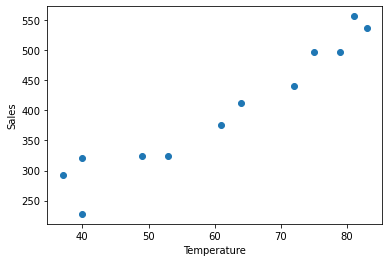

In [40]:
x1 = ice_cream_sales['Temperature']
y = ice_cream_sales['Sales']
plt.scatter(x1, y)
plt.xlabel('Temperature', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.show()

In [41]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

/home/stepheng753/.anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     123.5
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           6.00e-07
Time:                        21:40:13   Log-Likelihood:                -56.879
No. Observations:                  12   AIC:                             117.8
Df Residuals:                      10   BIC:                             118.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          35.5616     33.944      1.048      0.319     -40.071     111.194
Temperature     5.9581      0.536     11.112      0.000       4.763       7.153
==============================================================================
Omnibus:                        0.698   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.622
Skew:                           0.221   Prob(JB):                        0.733
Kurtosis:                       1.976   Cond. No.                         246.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

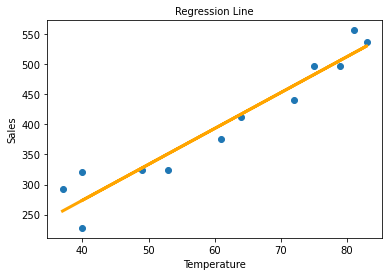

In [42]:
plt.scatter(x1, y)
y_hat = temp_sales_linear_regression[0] * x1 + temp_sales_linear_regression[1]
fig = plt.plot(x1, y_hat, lw=3, c='orange')
plt.xlabel('Temperature', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.title('Regression Line', fontsize=10)
plt.show()

## Part 9
https://www.youtube.com/watch?v=MltSxtX0sA0&list=PLGLfVvz_LVvQjNJr85J4U_lxDg8vgqvcO&index=11&ab_channel=DerekBanas

#### Root Mean Squared Deviation

 - Difference Between Samples and the Regression Line
 - The 68% of Sample Points, or 1 Standard Deviation from the Mean, will be off $\pm RMSD$ versus the Regression Line

$$
RMSD = \sqrt{\frac{\sum_{i = 1}^n (y_i - \hat{y_i})^2}{n - 1}}
$$
where $\hat{y_i}$ is the y value at $x_i$ correlating to the regression line

In [43]:
def root_mean_square_deviation(*args):
    if len(args[0]) != len(args[1]) or len(args[0]) <= 1:
        return None

    y_vals = args[0]
    y_regression = args[1]
    n = len(y_vals)
    RMSD_numerator = sum([(y_vals[i] - y_regression[i]) ** 2 for i in range(0, n)])
    RMSD_denominator = n - 1
    return math.sqrt(RMSD_numerator / RMSD_denominator)


sample_regression_list = [[292, 228, 324, 376, 440, 496, 536, 556, 496, 412, 324, 320], [256, 273, 327, 399, 464, 506, 530, 518, 482, 416, 351, 273]]
RMSD = root_mean_square_deviation(*sample_regression_list)
print('Root Mean Square: ', RMSD)

Root Mean Square:  28.864889020777788


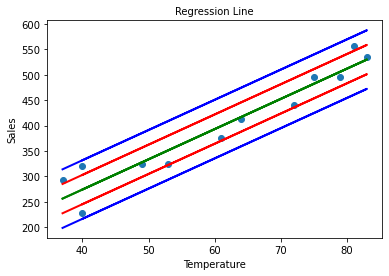

In [44]:
plt.scatter(x1, y)

colors = ['green', 'red', 'blue']
for i in range(0, 3):
    RMSD_y = y_hat + i * RMSD
    plt.plot(x1, RMSD_y, lw=2, c=colors[i])

    RMSD_y = y_hat - i * RMSD
    plt.plot(x1, RMSD_y, lw=2, c=colors[i])

plt.xlabel('Temperature', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.title('Regression Line', fontsize=10)
plt.show()

#### Chi Square Test

 - Conditions: Random, Large ($x_i > 5$), Independent
 - Chi Square Test of Homogeneity:
    - Relationship Between Different Categories of Variables
    - Sample 2 Groups to Compare Probability Distributions
 - Expected Value: Row_Total * Col_Total / Total
 - Degrees of Freedom: (Num_Rows - 1) * (Num_Cols - 1)
 
$$
\chi^2 = \sum_{i = 1}^n \frac{(x_i - \hat{x_i}) ^ 2}{\hat{x_i}}
$$
where $x_i$ is the Observed Value and $\hat{x_i}$ is the Expected Value

In [45]:
chi_sq_table = convert_csv_list('chi_sq_table.csv')

def get_confidence_chi_sq_table(df, chi_square):
    if df >= len(chi_sq_table):
        return None

    row = chi_sq_table[df]
    for col in range(0, len(row)):
        if chi_square <= row[col]:
            return 1 - chi_sq_table[0][col]

print('Confidence: ', get_confidence_chi_sq_table(3, 11.59))

Confidence:  0.995


In [46]:
def chi_square_test(*args):
    if len(args[0]) != len(args[1]):
        return None

    num_rows = len(args)
    num_cols = len(args[0])
    df = (num_rows - 1) * (num_cols - 1)
    total_column = [0 for i in range(0, num_cols)]
    total_row = []
    for row in range(0, num_rows):
        total_row.append(sum(args[row]))
        for col in range(0, num_cols):
            total_column[col] += args[row][col]
    total_elements = sum(total_row)

    expected_values = []
    for row in range(0, num_rows):
        expected_row = []
        for col in range(0, num_cols):
            expected_row.append(total_row[row] * total_column[col] / total_elements)
        expected_values.append(expected_row)

    chi_square = 0
    for row in range(0, num_rows):
        for col in range(0, num_cols):
            chi_square += ((args[row][col] - expected_values[row][col]) ** 2) / expected_values[row][col]

    return df, chi_square





fav_sport_lists = [[23, 12, 24, 7], [12, 13, 45, 6]]
sports_df = chi_square_test(*fav_sport_lists)[0]
sports_chi_square = chi_square_test(*fav_sport_lists)[1]
print('Sports Degree Freedom: ', sports_df)
print('Sports Chi Square Test: ', sports_chi_square)
print('Sports Confidence: ', get_confidence_chi_sq_table(sports_df, sports_chi_square))

Sports Degree Freedom:  3
Sports Chi Square Test:  9.307302948767477
Sports Confidence:  0.975
